<a href="https://colab.research.google.com/github/amartsin/fuzzy-c-means/blob/master/FCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fuzzy-c-means

In [19]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [27]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))
X

array([[-1.78410392, -1.64020294],
       [-1.07905772,  0.83777226],
       [-2.82282179, -1.94937452],
       ...,
       [ 0.85963409,  1.91296164],
       [ 1.72975683,  3.24046465],
       [ 2.23828672,  2.74257988]])

In [21]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

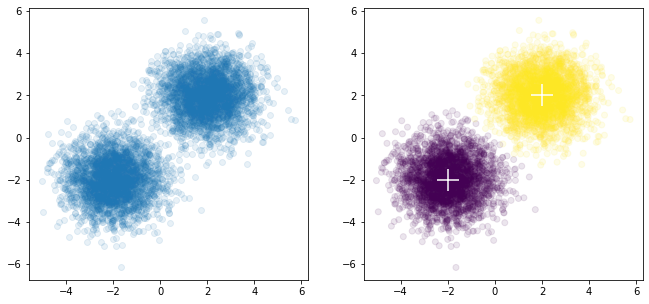

In [22]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

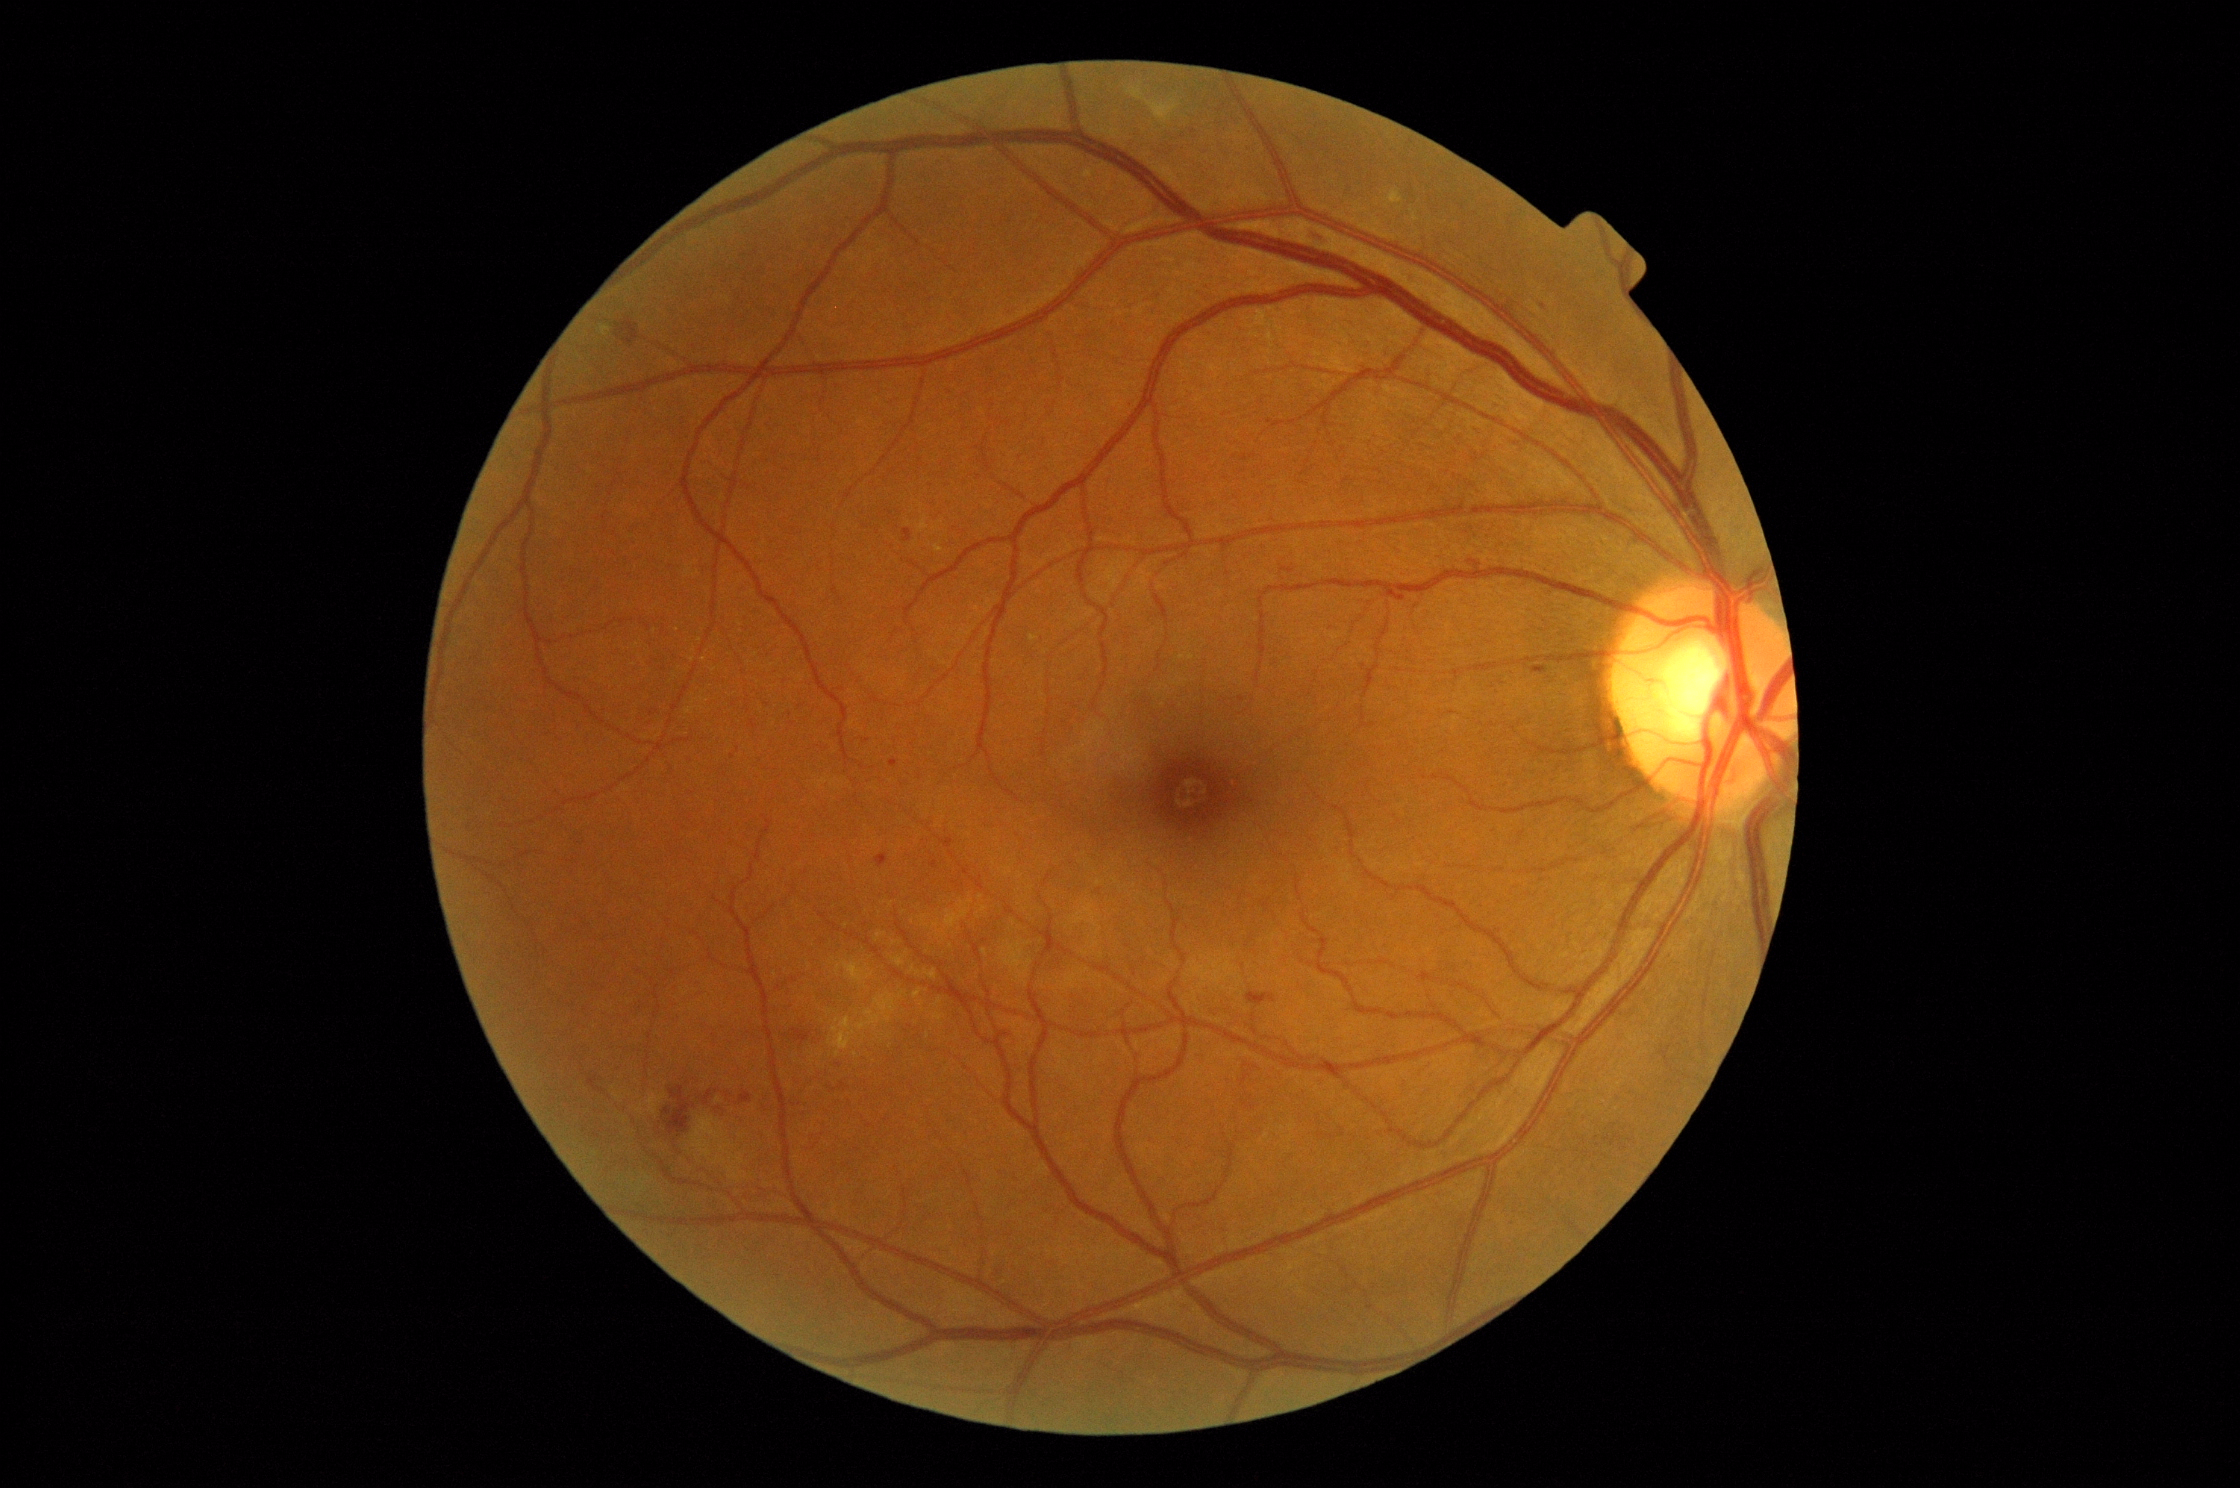

In [24]:
import PIL
from PIL import Image
im = cv2.imread('20051019_38557_0100_PP.tif')
cv2_imshow(im)

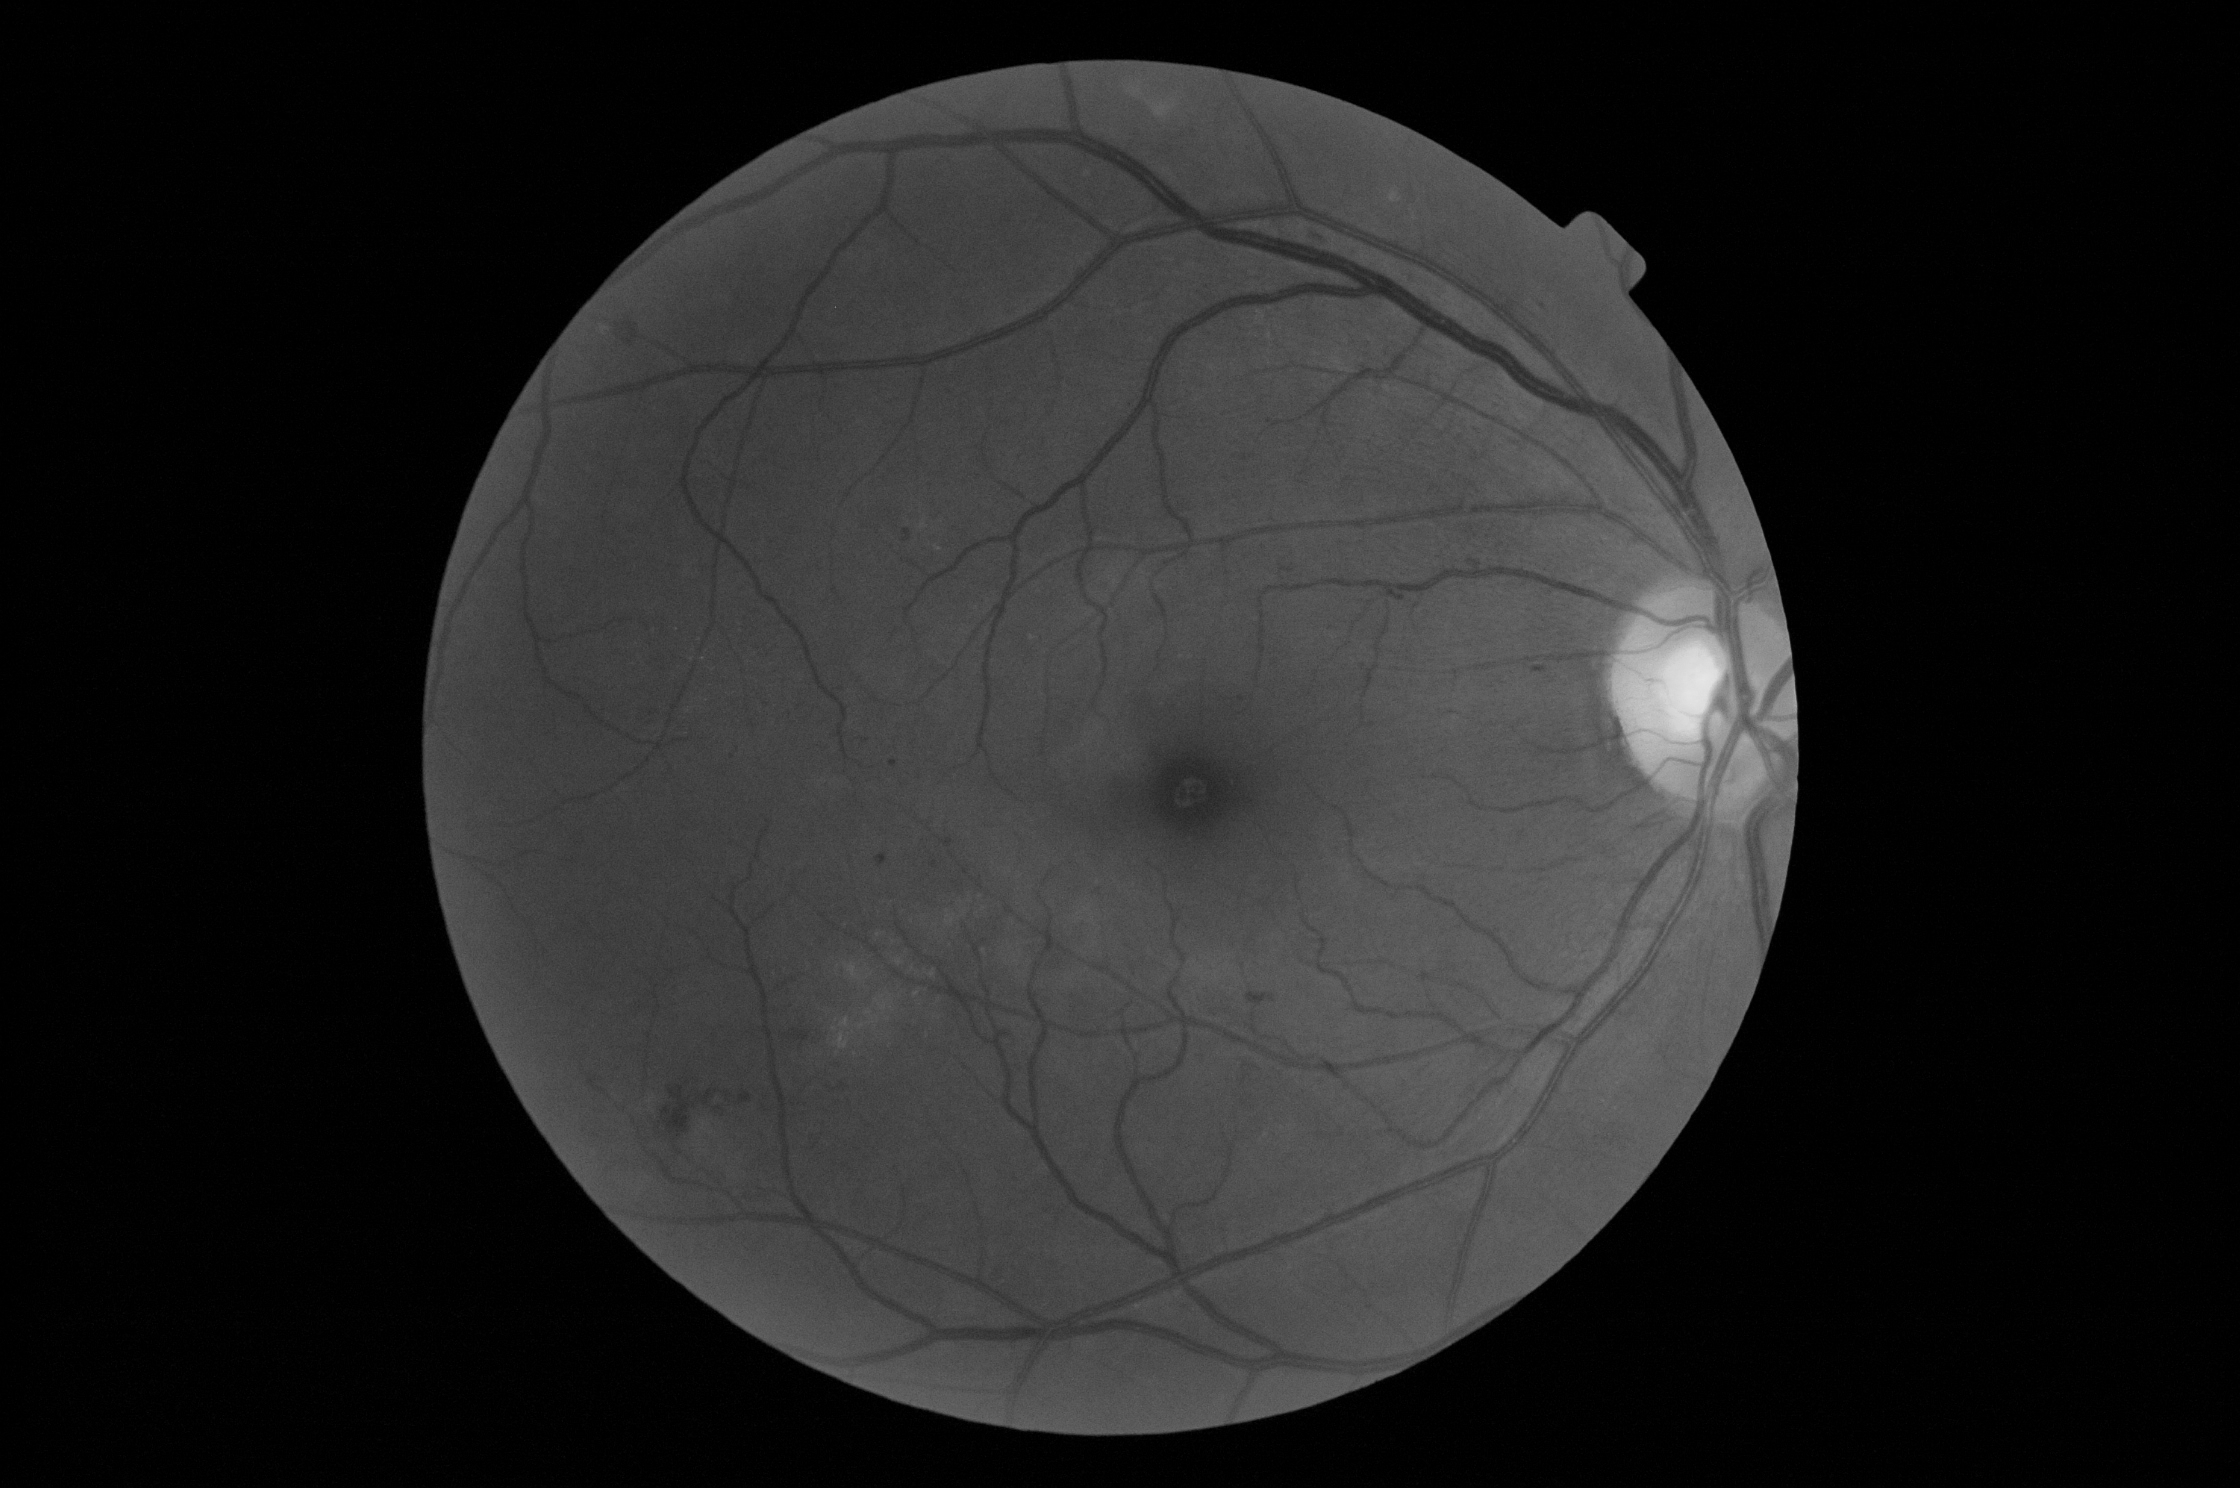

In [34]:
im_gray = cv2.imread('20051019_38557_0100_PP.tif', cv2.IMREAD_GRAYSCALE)
imarray = np.array(im)
cv2_imshow(im_gray)

In [69]:
fcm = FCM(n_clusters=50)
fcm.fit(im_gray)


In [70]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(im_gray)

In [71]:
fcm_centers = np.uint8(fcm_centers) 
segmented_data = fcm_centers[fcm_labels] 

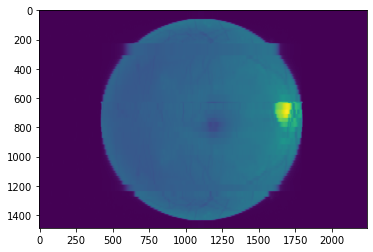

In [73]:
segmented_image = segmented_data.reshape((im_gray.shape)) 
plt.savefig('basic-clustering-output.jpg')
plt.imshow(segmented_image)